![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.callbacks import EarlyStopping, ModelCheckpoint
from IPython.display import Markdown as md

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/jsalcedo14/MIAD_ML_NLP_2023/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
https://raw.githubusercontent.com/elkindavid/MIAD_UNIANDES/data_movies/dataTraining.csv

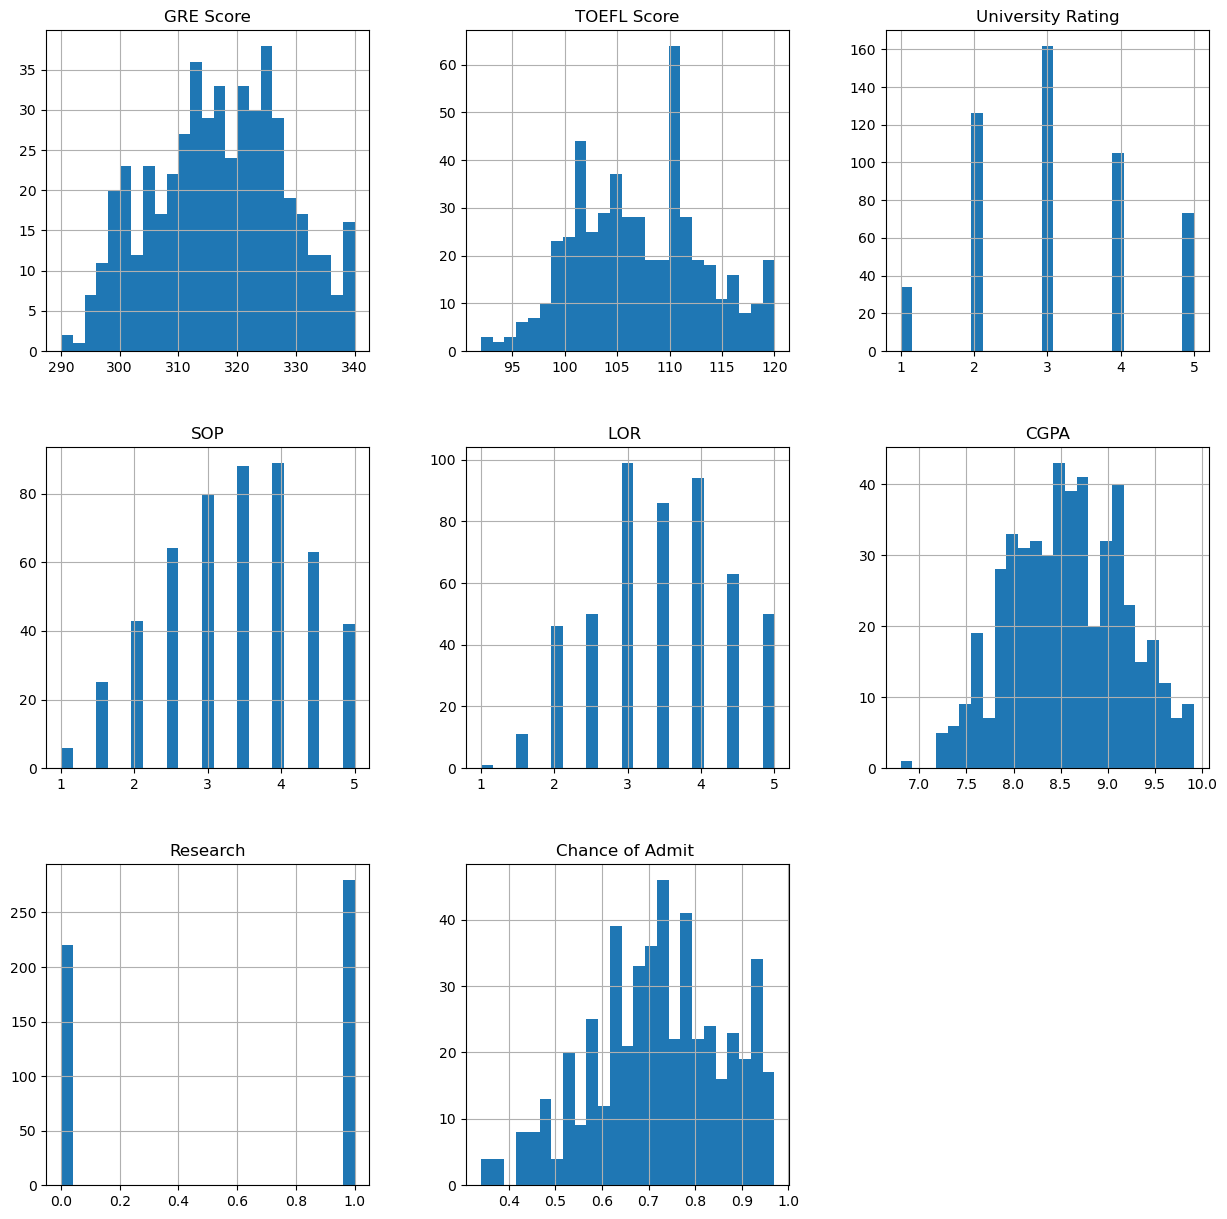

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

A partir del set de admisiones a la universidad, consideramos algunos histogramas para cada una de las características de la población de aspirantes. En particular vimos distribuciones que se asemejan a curvas normales para variables como los puntajes del GRE, TOEFL, rating de la universidad, SOP, LOR y promedio acumulado. La variable probabilidad de admisión, es la variable dependiente en nuestro análisis, también tiene una distribución de campana con un sesgo hacia tener una probabilidad de admisión superior al 0.7, indicando que la muestra de aspirantes de este set de datos corresponde a una cohorte con alta probabilidad de ser admitidos a los programas que aplicaron.

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = pd.DataFrame(np.array(data[data.columns[-1]]))
#pd.DataFrame(np.array(boston_dataset.target), columns=['labels'])

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.3 ,random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Celda 1
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [8]:
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [9]:
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [10]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


#### Análisis y Selección de Parámetros

In [11]:
dict_params_1c = {}
min_mse = 0

num_epocas = [40,50,60,70]
optimizador = ['sgd']
perdida = ['mean_squared_error', 'mean_absolute_error']

seq = Sequential()
seq.add(Dense(output_var, input_shape=(dims,)))

for e in num_epocas:
    for o in optimizador:
        for p in perdida:
            seq.compile(optimizer=o, loss=p)
            seq.fit(X_train, Y_train,
                     verbose=0,
                     epochs=e,
                     validation_data=(X_test, Y_test))
            Y_pred = seq.predict(X_test, verbose=None)
            
            if min_mse == 0: 
                min_mse = round(mean_squared_error(Y_test, Y_pred),3)
                item = {'mse': min_mse, 'num_epocas':e, 
                    'optimizador': o, 'perdida': p}
                dict_params_1c.update(item)
            else:
                if round(mean_squared_error(Y_test, Y_pred),3) < min_mse:
                    min_mse = round(mean_squared_error(Y_test, Y_pred),3)
                    item = {'mse': min_mse, 'num_epocas':e, 
                    'optimizador': o, 'perdida': p}
                    dict_params_1c.update(item)

print(f'Best Params: { dict_params_1c }')

Best Params: {'mse': 0.003, 'num_epocas': 40, 'optimizador': 'sgd', 'perdida': 'mean_absolute_error'}


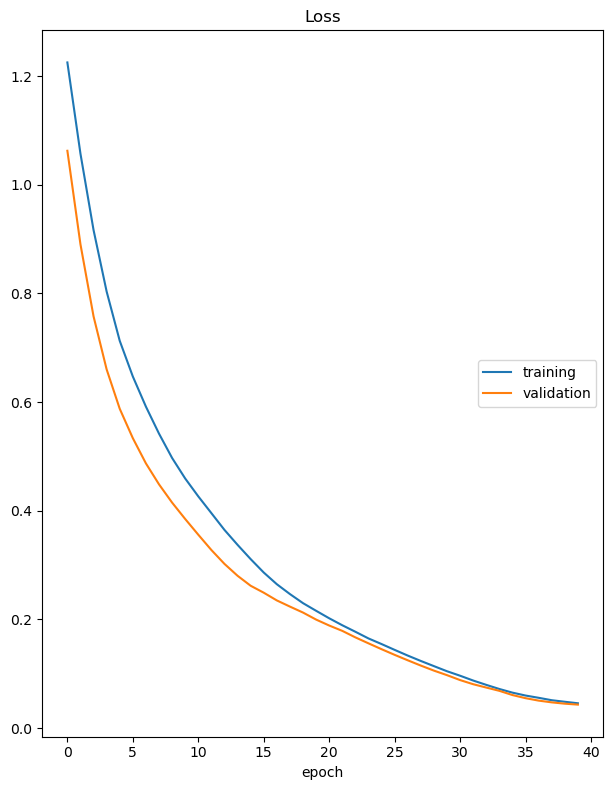

Loss
	training         	 (min:    0.046, max:    1.225, cur:    0.046)
	validation       	 (min:    0.043, max:    1.063, cur:    0.043)
11/11 [==============================] - 0s 22ms/step - loss: 0.0455 - val_loss: 0.0431


In [12]:
K.clear_session()
# Definición de función de perdida. 
model.compile(optimizer=dict_params_1c['optimizador'], loss=dict_params_1c['perdida'])
# Entrenamiento de la red neuronal
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=dict_params_1c['num_epocas'], 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

#### Desempeño del modelo

In [13]:
Y_pred = model.predict(X_test, verbose=None)
MSE_RN1 = round(mean_squared_error(Y_test, Y_pred),3)
MAE_RN1 = round(mean_absolute_error(Y_test, Y_pred),3)

print(f'El error cuadrático medio para la red neuronal de una capa es: { MSE_RN1 }')
print(f'El error absoluto medio para la red neuronal de una capa es: { MAE_RN1 }')

El error cuadrático medio para la red neuronal de una capa es: 0.004
El error absoluto medio para la red neuronal de una capa es: 0.043


Se crea una Red Neuronal de una capa para predecir la probabilidad de admsión de los estudiantes con la función de pérdida, optimizador y número de épocas que dió el mejor mse en el análisis y selección de parámetros, los cuales fueron **mean_absolute_error**, **sgd** y **40** respectivamente.

El optmizador se escoje porque requiere menos recursos de memoria y el entrenamiento es mucho más rápido.

Se grafica la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación dando un resultado consistente, poco divergente y convergen en la época **39** aproximadamente.

Finalmente se presenta el desempeño del modelo con las métricas **MSE** y **MAE** de **0.004** y **0.043**, las cuales reflejan que el error del modelo es mínimo y por lo tanto su poder predictivo es bueno.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

#### Análisis y Selección de Parámetros

In [14]:
dict_params_2c = {}
min_mse = 0

n = [40,50,60,70]
optimizador = ['sgd']
perdida = ['mean_squared_error', 'mean_absolute_error']
neuronas = [50,100,150,200,250]

Xtrain, Xval, Ytrain, Yval = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

for n in neuronas:
    K.clear_session()
    seq = Sequential()
    seq.add(Dense(n, input_shape=(dims,),activation='relu'))
    seq.add(Dense(n/2,activation='relu'))
    seq.add(Dense(output_var))
    seq.add(Activation('relu'))

    for e in num_epocas:
        for o in optimizador:
            for p in perdida:
                seq.compile(optimizer=o, loss=p)
                seq.fit(Xtrain, Ytrain,
                         verbose=0,
                         epochs=e,
                         validation_data=(Xval, Yval))
                Y_pred = seq.predict(X_test, verbose=None)

                if min_mse == 0: 
                    min_mse = round(mean_squared_error(Y_test, Y_pred),3)
                    item = {'mse': min_mse, 'num_epocas':e, 
                        'optimizador': o, 'perdida': p, 'neuronas_c1': n, 'neuronas_c2': n/2}
                    dict_params_2c.update(item)
                else:
                    if round(mean_squared_error(Y_test, Y_pred),3) < min_mse:
                        min_mse = round(mean_squared_error(Y_test, Y_pred),3)
                        item = {'mse': min_mse, 'num_epocas':e, 
                        'optimizador': o, 'perdida': p, 'neuronas_c1': n, 'neuronas_c2': n/2}
                        dict_params_2c.update(item)

print(f'Best Params: { dict_params_2c }')

Best Params: {'mse': 0.004, 'num_epocas': 50, 'optimizador': 'sgd', 'perdida': 'mean_absolute_error', 'neuronas_c1': 150, 'neuronas_c2': 75.0}


In [15]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model2 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model2.add(Dense(dict_params_2c['neuronas_c1'], input_shape=(dims,),activation='relu'))
model2.add(Dense(dict_params_2c['neuronas_c2'],activation='relu'))
model2.add(Dense(output_var))
model2.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1200      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 1)                 76        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 12,601
Trainable params: 12,601
Non-trainable params: 0
_________________________________________________________________
None


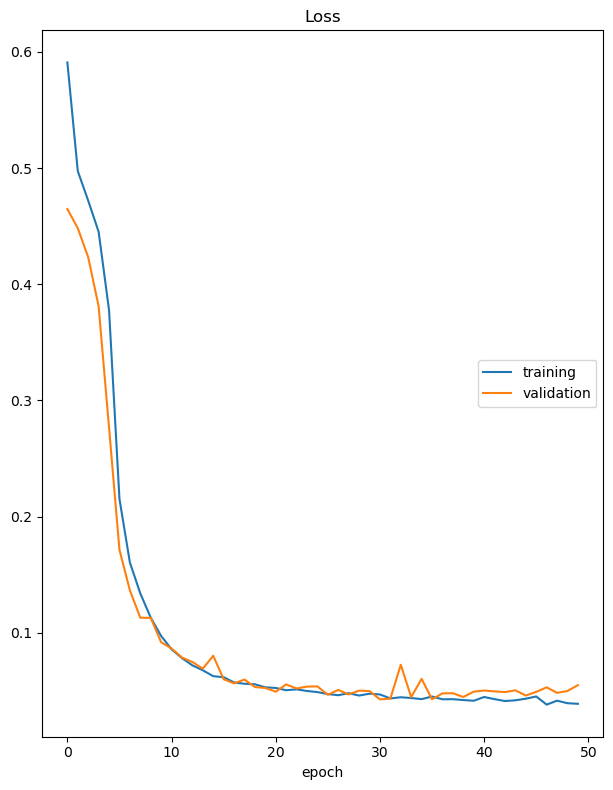

Loss
	training         	 (min:    0.038, max:    0.591, cur:    0.039)
	validation       	 (min:    0.043, max:    0.465, cur:    0.055)
10/10 [==============================] - 0s 24ms/step - loss: 0.0390 - val_loss: 0.0551


In [16]:
# Definición de función de perdida. 
model2.compile(optimizer=dict_params_2c['optimizador'], loss=dict_params_2c['perdida'])
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)
# Entrenamiento de la red neuronal
model2.fit(X_train2, Y_train2,
          validation_data = (X_val2, Y_val2),
          epochs=dict_params_2c['num_epocas'], 
          callbacks=[PlotLossesKeras()])

#### Desempeño del modelo

In [17]:
Y_pred = model2.predict(X_test, verbose=None)
MSE_RN2 = round(mean_squared_error(Y_test, Y_pred),3)
MAE_RN2 = round(mean_absolute_error(Y_test, Y_pred),3)

print(f'El error cuadrático medio para la red neuronal de dos capa es: { MSE_RN2 }')
print(f'El error absoluto medio para la red neuronal de dos capa es: { MAE_RN2 }')

El error cuadrático medio para la red neuronal de dos capa es: 0.006
El error absoluto medio para la red neuronal de dos capa es: 0.059


Se crea una Red Neuronal de dos capa para predecir la probabilidad de admsión de los estudiantes con la función de pérdida, optimizador, número de épocas y número de neuronas que dió el mejor mse en el análisis y selección de parámetros, los cuales fueron **mean_absolute_error**, **sgd**, **50** y **150/75** respectivamente.

El optmizador es escoje porque requiere menos recursos de memoria y el entrenamiento es mucho más rápido.

Se grafica la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación dando un resultado consistente, poco divergente y convergen en la época **30** aproximadamente, sin llegar a estabilizarse.

Finalmente se presenta el desempeño del modelo con las métricas **MSE** y **MAE** de **0.006** y **0.059**, las cuales reflejan que el error del modelo es mínimo y por lo tanto su poder predictivo es bueno, sin embargo desmejoró en comparación a la red neuronal de una sola capa.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

#### Análisis y Selección de Parámetros

In [18]:
dict_params_3c = {}
min_mse = 0

n = [40,50,60,70]
optimizador = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
neuronas = [50,100,150,200,250]

Xtrain, Xval, Ytrain, Yval = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

for n in neuronas:
    K.clear_session()
    early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=0) 
    fBestModel = 'best_model.h5'
    best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)
    seq = Sequential()
    seq.add(Dense(n, input_shape=(dims,),activation='relu'))
    seq.add(Dropout(0.2))
    seq.add(Dense(n/2,activation='relu'))
    seq.add(Dropout(0.4))
    seq.add(Dense(output_var))
    seq.add(Activation('relu'))
    
    for e in num_epocas:
        for o in optimizador:
            for p in perdida:
                seq.compile(optimizer=o, loss=p)
                seq.fit(Xtrain, Ytrain,
                         verbose=0,
                         epochs=e,
                         validation_data=(Xval, Yval),
                         callbacks=[best_model, early_stop])
                Y_pred = seq.predict(X_test, verbose=None)

                if min_mse == 0: 
                    min_mse = round(mean_squared_error(Y_test, Y_pred),3)
                    item = {'mse': min_mse, 'num_epocas':e, 
                        'optimizador': o, 'perdida': p, 'neuronas_c1': n, 'neuronas_c2': n/2}
                    dict_params_3c.update(item)
                else:
                    if round(mean_squared_error(Y_test, Y_pred),3) < min_mse:
                        min_mse = round(mean_squared_error(Y_test, Y_pred),3)
                        item = {'mse': min_mse, 'num_epocas':e, 
                        'optimizador': o, 'perdida': p, 'neuronas_c1': n, 'neuronas_c2': n/2}
                        dict_params_3c.update(item)

print(f'Best Params: { dict_params_3c }')

Best Params: {'mse': 0.005, 'num_epocas': 60, 'optimizador': 'sgd', 'perdida': 'mean_squared_error', 'neuronas_c1': 200, 'neuronas_c2': 100.0}


In [19]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)
# Definición red neuronal con la función Sequential()
model3 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model3.add(Dense(dict_params_3c['neuronas_c1'], input_shape=(dims,),activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(dict_params_3c['neuronas_c2'],activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(output_var))
model3.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               1600      
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 21,801
Trainable params: 21,801
Non-trai

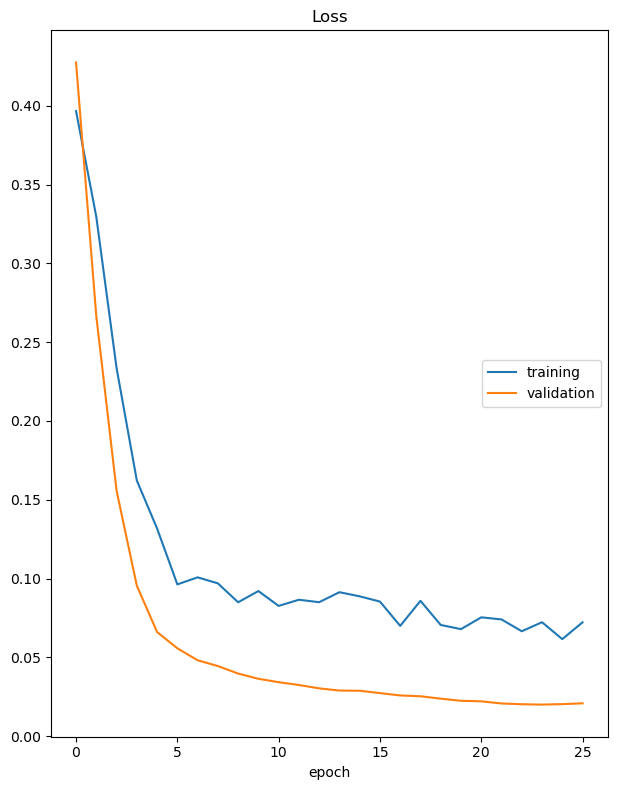

Loss
	training         	 (min:    0.062, max:    0.397, cur:    0.072)
	validation       	 (min:    0.020, max:    0.427, cur:    0.021)
3/3 [==============================] - 0s 99ms/step - loss: 0.0722 - val_loss: 0.0208
Epoch 26: early stopping


In [20]:
# Definición de función de perdida. 
model3.compile(optimizer=dict_params_3c['optimizador'], loss=dict_params_3c['perdida'])
# Separación de datos de entrenamiento para considerar un set de validación durante entrenamiento
X_train3, X_val3, Y_train3, Y_val3 = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

# Entrenamiento de la red neuronal con early stopping
model3.fit(X_train3, Y_train3, 
          epochs=dict_params_3c['num_epocas'], 
          batch_size=128,
          validation_data=(X_val3,Y_val3),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

#### Desempeño del modelo

In [21]:
Y_pred = model3.predict(X_test, verbose=None)
MSE_RN3 = round(mean_squared_error(Y_test, Y_pred),3)
MAE_RN3 = round(mean_absolute_error(Y_test, Y_pred),3)

print(f'El error cuadrático medio para la red neuronal de tres capa es: { MSE_RN3 }')
print(f'El error absoluto medio para la red neuronal de tres capa es: { MAE_RN3 }')

El error cuadrático medio para la red neuronal de tres capa es: 0.024
El error absoluto medio para la red neuronal de tres capa es: 0.131


Se crea una Red Neuronal de tres capa para predecir la probabilidad de admsión de los estudiantes con la función de pérdida, optimizador, número de épocas y número de neuronas que dió el mejor mse en el análisis y selección de parámetros, los cuales fueron **mean_squared_error**, **sgd**, **60** y **200/100** respectivamente.

El optmizador es escoje porque requiere menos recursos de memoria y el entrenamiento es mucho más rápido.

Se grafica la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación dando un resultado consistente y poco divergente, y a través del método early stopping identificando que la pérdida en validación no disminuye por 2 epocas consecutivas, entonces se detiene la ejecución del entrenamiento al no encontrar mejoras significativas en la reducción del error.

Finalmente se presenta el desempeño del modelo con las métricas **MSE** y **MAE** de **0.024** y **0.131**, las cuales reflejan que el error del modelo es mínimo y por lo tanto su poder predictivo es bueno, sin embargo desmejoró en comparación a la red neuronal de dos capas.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

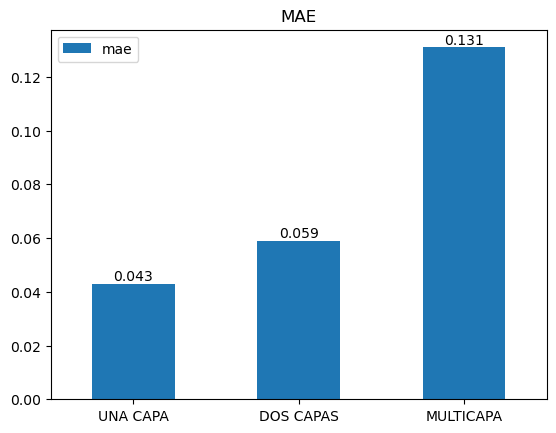

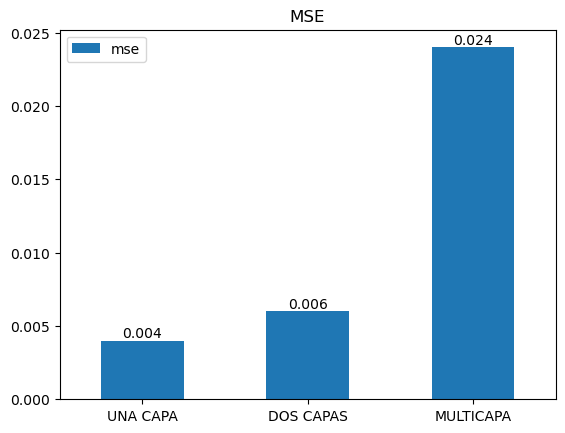

In [23]:
df_mae = pd.DataFrame({'name': ['UNA CAPA','DOS CAPAS','MULTICAPA'],
                       'mae': [MAE_RN1, MAE_RN2, MAE_RN3]
                      })

df_mse = pd.DataFrame({'name': ['UNA CAPA','DOS CAPAS','MULTICAPA'],
                       'mse': [MSE_RN1, MSE_RN2, MSE_RN3]
                      })

ax_mae = df_mae.plot.bar(x = 'name', y = 'mae', title = 'MAE', xlabel = '', rot = 0)
for container in ax_mae.containers:
    ax_mae.bar_label(container)

ax_mse = df_mse.plot.bar(x = 'name', y = 'mse', title = 'MSE', xlabel = '', rot = 0)
for container in ax_mse.containers:
    ax_mse.bar_label(container)

Como se puede observar en la gráfica, el mejor modelo fue la red neuronal de una sola capa, el cual obtuvo el menor indicador tanto en **MSE** como en **MAE**, esto debido a que se hizo un adecuado análisis y selección de parámetros y además es el modelo con menor complejidad y se ajustó muy bien a los datos, evitando el overfitting. Por otra parte el modelo multicapa apesar de que contaba con regularizadores early stopping y dropout que permiten entrenar modelos más generalizados, no se ajustó muy bien a los datos, debido a su complejidad que para este caso no aplicaba.